# Exploring the Dynamics of Real Estate Market in King County.

## Group Members.

Bennie Kibet

Victor Muuo

Chemutai Annolyne

Josphat Wanjiru

Eric Rono

Gladys Mosota

## Overview

The King County Housing Data Set provides information about houses in King County, including their size, location, condition, and other features. The objective of this project is to create a multiple regression model that can accurately predict the price of a house.

The project is commissioned by a commercial real estate company interested in purchasing homes within a specific area. Their main concerns revolve around obtaining predicted prices for homes in the area, and assessing any notable disparities between the actual prices and our model's predicted prices.    

## Business Understanding

The client's primary objective is to develop a platform that can offer precise house price estimates which are paramount for both buyers and sellers in King County.

In order to achieve this, we are required to come up with a model that is capable of deducing the main factors that influence the house prices. In order to train the model effectively, the client seeks to utilize accurate and representative data pertaining to the real estate market in King County. This data contains historical sales, current listings, size of the property and other pertinent features.

The model will be able to make precise estimations of a house's value based on its features upon successful training, the model can be seamlessly integrated into the platform, providing buyers and sellers with reliable estimates of house prices. The information drawn from the model will help both buyers and sellers to make well-informed decisions regarding property transactions.

Harnessing the power of technology by delivering a dependable and accurate platform for house buying and selling in King County, the client can establish themselves as a trusted source in the local real estate market which will then in turn attract a dedicated customer base.   

### Problem Statement

Riaor Real Estate faces challenge in effectively entering the dynamic King County real estate market due to the complex interplay of factors influencing housing prices and demand. Understanding the intricate relationship between property features,seasonal trends, and market dynamics is crucial for developing successful market penetration and growth strategies.  

### Objectives:  

1. **Identify key determinants of house prices:**
The goal is to determine which features of a house have the most significant impact on its price in King county.  

2. **Develop a Multiple Regression Model for Predicting House Prices:**   
Create a multiple linear regression model using the identified key determinants to predict the house prices. Evaluate the model's performance using appropriate metrics such as R-squared, RMSE, and MAE.   

3. **Assess Model Accuracy and Disparities:**   
Compare the predicted house prices with the actual prices to identify any notable disparities. Perform residual analysis to understand and address any systematic errors or biases in the model's predictions.  

4. **Provide Insights and Recommendations for Real Estate Decision-Making:**   
Generate actionable insights from the model's results to help the client make informed decisions about buying and selling houses in King County. Highlight the most influential factors and suggest strategies to maximize property value.

# Importing Libraries

In [251]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


# Data Loading

In [252]:
df = pd.read_csv("work\kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [253]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **Date** - house was sold
* **Price** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


# EDA and Data Cleaning

In [254]:
#checking data  shape
df.shape
print('Number of rows =', df.shape[0])
print('Number of columns =', df.shape[1])

Number of rows = 21597
Number of columns = 21


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [256]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [257]:
# Checking for null values 
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The dataset contains a significant number of NaN values relative to its size (21,597 entries).

    The output indicates the count of missing values (NaN or null values) for each column in King county Housing dataset:

    waterfront has 2376 missing values, View has 63 missing values whereas yr_renovated has 3842 missing values

In [258]:
#'Condition' column transformation
df['condition'].replace(to_replace=['Poor', 'Fair', 'Average', 'Good', 'Very Good'], value=[1, 2, 3, 4, 5], inplace=True)

In [259]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2310.0        1
3260.0        1
862.0         1
243.0         1
2196.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [260]:
# Changing the sqft_basement from object to int
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

In [261]:
df['has_basement'] = df['sqft_basement'].apply(lambda x: 0 if x == 0 else 1)

In [262]:
df.drop(columns=['sqft_basement'], inplace=True)

In [263]:

# Changing the date to datetime
df['date'] = pd.to_datetime(df['date'])

# Extracting only the year from the column 'date' and updating the 'date' column to contain only the year
df['date'] = df['date'].dt.year

# Creating a new column for sell year (same as the year extracted from 'date')
df['sell_yr'] = df['date']

# Dropping the original 'date' column as it is now redundant
df.drop(columns='date', inplace=True)


In [264]:
#'Grade' column transformation
df['grade'].replace(to_replace=['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], value=[7, 6, 8, 11, 9, 5, 10, 12, 4, 3, 13], inplace=True)

In [265]:
#'View' column transformation
df['view'].replace(to_replace=['NONE', 'AVERAGE', 'GOOD', 'FAIR', 'EXCELLENT'], value=[0, 1, 2, 3, 4], inplace=True)

In [266]:

# Function to calculate percentage of missing data in a column
def missing_data(df, column):
    length_of_df=len(df)                                                    
    missing_data= column.isna().sum()                                       
    percentage_of_missing_data = round((missing_data/length_of_df*100),2)   
    return print(f"Percentage of Missing Data: {percentage_of_missing_data}""%")

In [267]:
# percentage of missing data
missing_data(df,df["yr_renovated"])


Percentage of Missing Data: 17.79%


##### **Observation:** 
From the above the percentage for missing values for year renovated is significantly high at 17% which would greatly affect the dataset therefore we replace it with the most occuring value in the same column i.e zero(0). 

In [268]:
# Replacing NaN values in yr_renovated column
df["yr_renovated"].fillna(df["yr_renovated"].mode()[0], inplace= True)
df["yr_renovated"].isna().sum()

0

In [269]:
df['age_home'] = 2015 - df['yr_built']

df['yrsince_reno'] = [(2015 - val)  if (val !=0.0) else None for val in df['yr_renovated'] ]
#expression1 if condition else expression2 for item in iterable
df['yrsince_reno'] = df['yrsince_reno'].fillna(df['age_home'])
df.drop(columns=['yr_built', 'yr_renovated'],inplace=True)

In [270]:
# Waterfront missing data
missing_data(df, df['waterfront'])

Percentage of Missing Data: 11.0%


##### **Observation:** 
The Null values account for 11% of the dataset. This constitutes a significant percentage of the dataset therefore instead of to dropping them the missing values for the 'waterfront' column were replaced by the modal value of 'waterfronts' for all houses that share the same 'zipcode'. This method effectively imputes missing data based on the most frequent value within the specified group(zipcodes).

In [271]:

# Function to replace nulls in column waterfront with the mode of waterfront for the same zipcode
def replace_null_with_mode(df, target_col, group_col):
    # Iterating through the rows with null values in the target column
    for index, row in df[df[target_col].isnull()].iterrows():
        # Getting the corresponding group value (zipcode)
        group_value = row[group_col]
        # Filtering the DataFrame to include only rows with the same group value and non-null target values
        filtered_df = df[(df[group_col] == group_value) & df[target_col].notnull()]
        # Getting the mode of the target column in the filtered DataFrame
        mode_value = filtered_df[target_col].mode()
        # Checking if mode_value is not empty
        if not mode_value.empty:
            # Replacing the null value with the mode value
            df.at[index, target_col] = mode_value[0]
    return df

# Replacing nulls in waterfront with the mode of waterfronts for the same zipcode
df = replace_null_with_mode(df, 'waterfront', 'zipcode')

len(df)


21597

In [272]:
df['waterfront'].isna().sum()

0

In [273]:
df['waterfront'].value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [274]:
df['view'].value_counts()

0.0    19422
1.0      957
2.0      508
3.0      330
4.0      317
Name: view, dtype: int64

In [275]:
df['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [276]:
df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [277]:
#handling missing values in view columns
df['view'].fillna(df['view'].median(), inplace=True)


#dropped remaining missing values in the yr_renovated and sqft_basement columns
#df.dropna(inplace=True)



#Checking for null values
df.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
has_basement     0
sell_yr          0
age_home         0
yrsince_reno     0
dtype: int64

In [278]:
# checking for duplicates
df.duplicated().sum()

2

Additional observations
Price column seems to be the price since last sold. This could be an out of date column if it has been a long while since last sold. We should make a 2 features:

    age of home

    how many years since last sold.

Sqft_living15 seems to be an average of the 15 properties around sqft_lot15 seems to be average of 15 lots around

The data is about houses in zipcodes around Seattle, WA.

The dependent variable is Price and min value is 78000 and max is 7,700,000 and a mean of 540296 and median of 450000.

sq_ft living ranges from 370 to 13540 sf ft.

bedrooms range from 1 to 33 with a mean of 3.37 and median of 3.

sqft_lot range from 520 to 1651359.0 with mean of 15099 and median of 7618.

zipcode-70 zipcodes

grade - grade from kings county grading system 3-13

condition- 1 to 5 with 5 being best

view- has been viewed between 0 - 4 times

waterfront- view of waterfront is 0-1, 1 being yes

In [279]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,sell_yr,age_home,yrsince_reno
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NO,0.0,3,...,1180,98178,47.5112,-122.257,1340,5650,0,2014,60,60.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,0.0,3,...,2170,98125,47.7210,-122.319,1690,7639,1,2014,64,24.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,0.0,3,...,770,98028,47.7379,-122.233,2720,8062,0,2015,82,82.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,0.0,5,...,1050,98136,47.5208,-122.393,1360,5000,1,2014,50,50.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,0.0,3,...,1680,98074,47.6168,-122.045,1800,7503,0,2015,28,28.0


## EDA
##### Price(target variable)   
High standard deviation indicates a wide range of house prices.   
The median (50% percentile) is lower than the mean, suggesting potential positive skewness (a long tail to the right), which is common in house price data.  
so i might consider log transforming it for a better model  
below lets check relationships between these features and the target variable.

In [280]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,sell_yr,age_home,yrsince_reno
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.195907,3.409825,7.657915,1788.596842,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,0.406121,2014.322962,44.000324,42.054869
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.687319,0.650546,1.173200,827.759761,53.513072,0.138552,0.140724,685.230472,27274.441950,0.491119,0.467619,29.375234,28.945393
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,2014.000000,0.000000,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,0.000000,2014.000000,18.000000,16.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,0.000000,2014.000000,40.000000,38.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,1.000000,2015.000000,64.000000,61.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,2015.000000,115.000000,115.000000


In [281]:
df['price_log'] = np.log1p(df['price'])

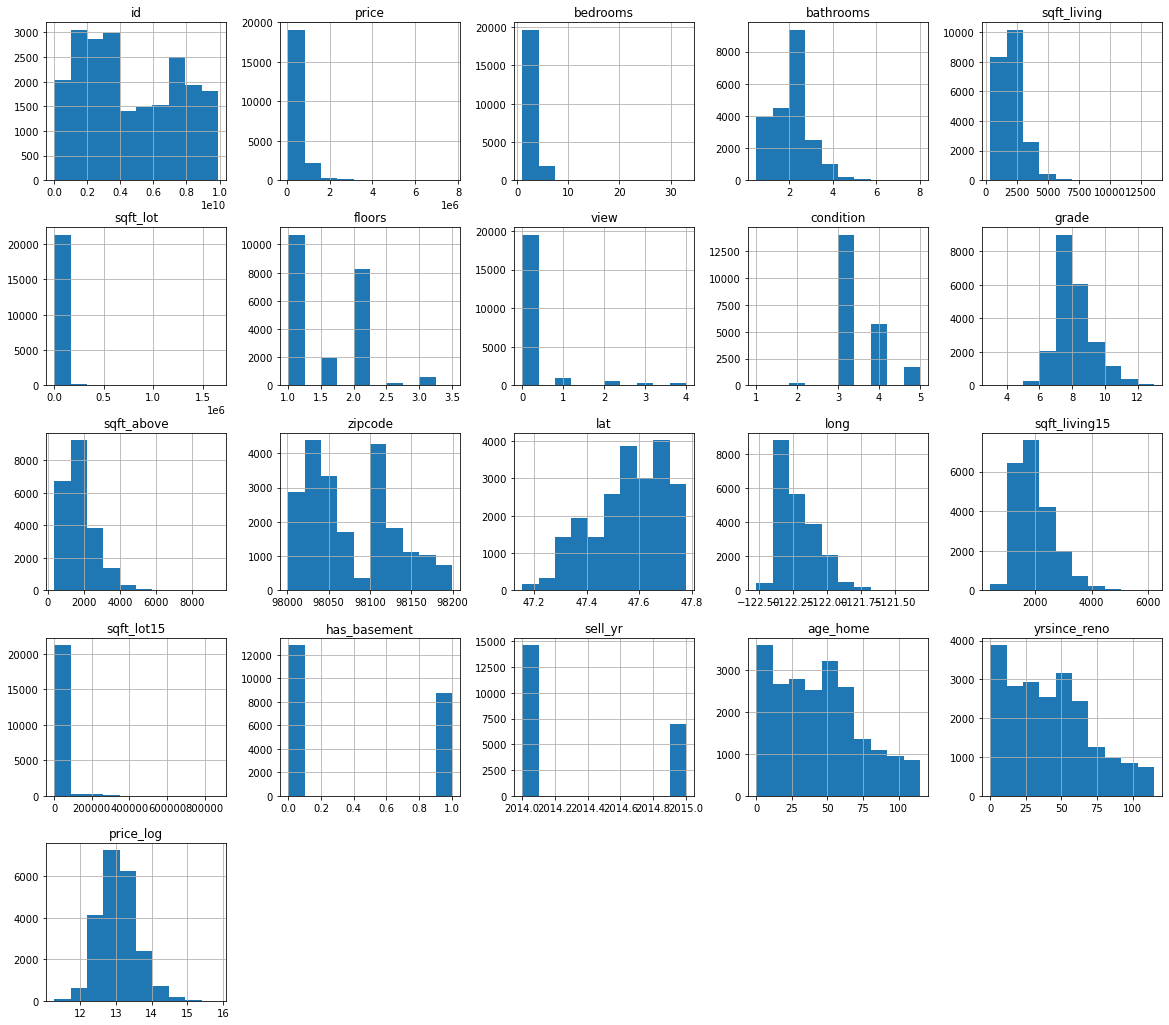

In [282]:
df.hist(figsize = (20,18));

In [283]:
# Splitting the columns based on variable types
categorical_columns = []
numerical_columns = []
for i in df.columns:
    if df[i].dtype == 'O':
        categorical_columns.append(i)
    else:
        numerical_columns.append(i)
        
print(f"Categorical columns:",  categorical_columns) 
print(f"Numerical columns:",  numerical_columns) 

Categorical columns: ['waterfront']
Numerical columns: ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'has_basement', 'sell_yr', 'age_home', 'yrsince_reno', 'price_log']


#### Observations from the Histograms  

**1. Skewness:** Many features exhibit positive skewness, meaning there are a few extremely high values pulling the tail to the right. Examples include price, sqft_living, sqft_lot, etc.  

**2. Outliers:** Some features, such as price, sqft_living, and sqft_lot, might contain outliers which are data points that deviate significantly from the overall pattern.  

**3. Multimodality:** Some features, like zipcode, might exhibit multimodality, indicating multiple clusters or groups within the data.   

**4. Range:** The range of values for each feature varies significantly. Some features have a wide range (e.g., price, sqft_living), while others have a narrower range (e.g., floors, waterfront).

considering these observations 
Before proceeding with the most affecting features we have to handle the outliers first  inorder to know what to do with them before proceeding.  


## Checking for outliers

In [284]:
# Outlier Analysis
# defining a function for plotting boxplot
def boxplot_graph(df1, number_of_columns, columns_to_plot):

    # Creating subplots
    num_columns = len(columns_to_plot)

    # Number of rows and columns for subplots
    ncols = number_of_columns
    nrows = math.ceil(num_columns/ ncols)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 20))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Plotting each column in a separate subplot
    for i, column in enumerate(columns_to_plot):
        sns.boxplot(y=df1[column], color="r", ax=axes[i])
        axes[i].set_title(column)

    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust the layout to add space between rows
    plt.subplots_adjust(hspace=3) 

    plt.suptitle('Box Plots of Different Columns')
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the main title
    return plt.show()




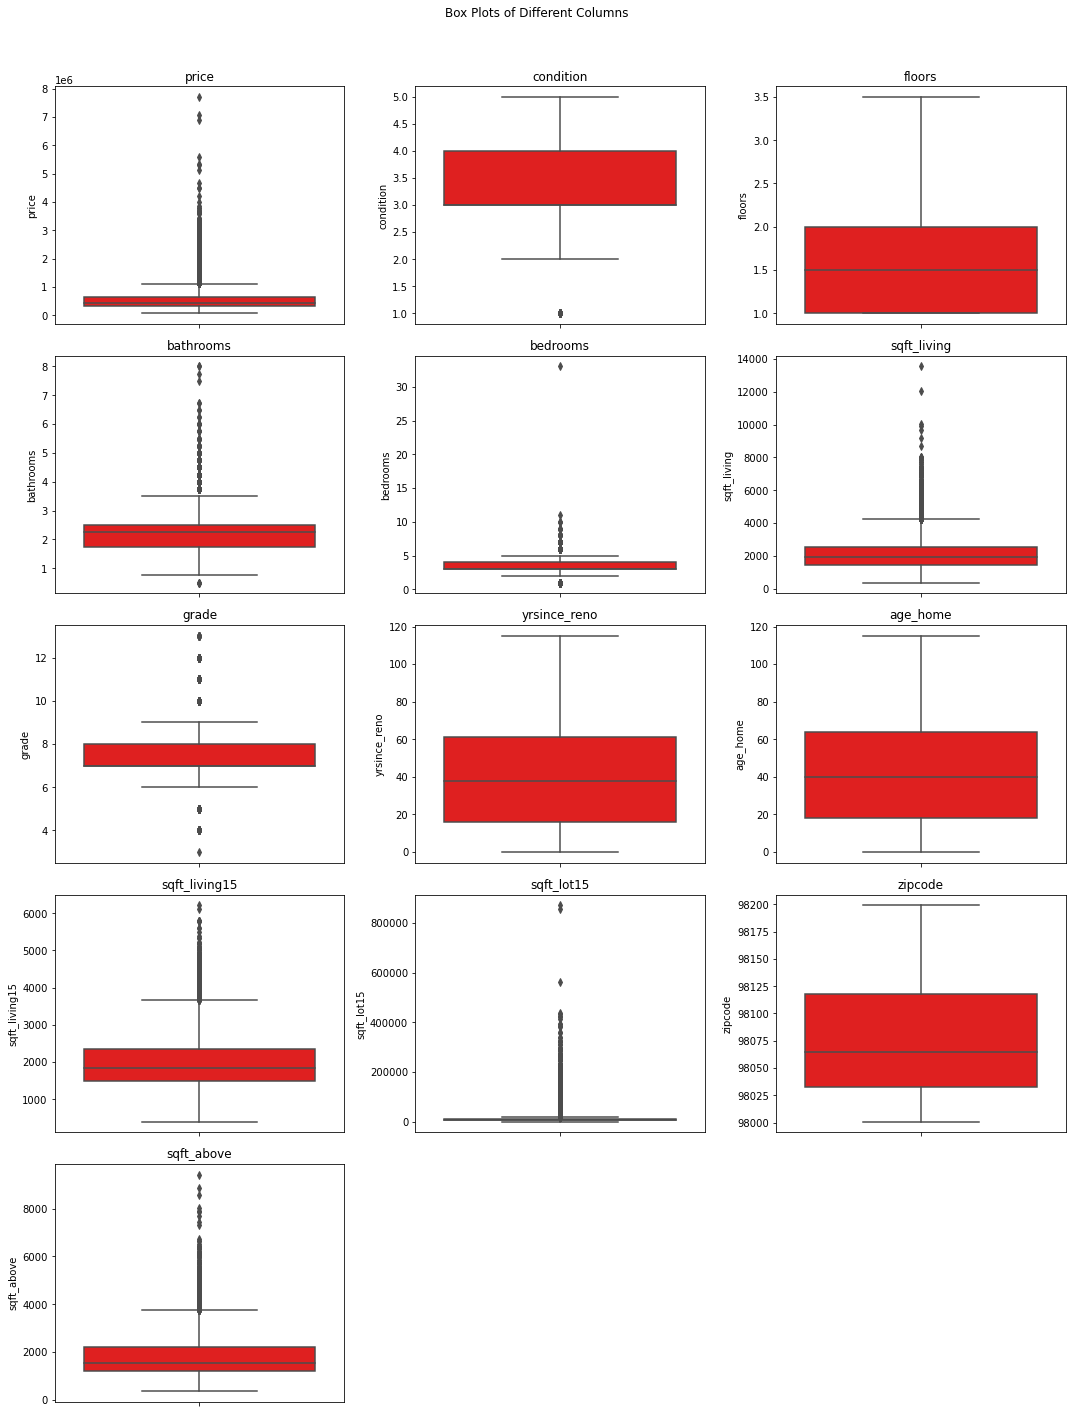

In [285]:
# Plotting the boxplot for the defined columns
columns_to_plot = ['price', 'condition', 'floors', 
                    'bathrooms', 'bedrooms', 'sqft_living', 
                    'grade', 'yrsince_reno', 'age_home', 
                    'sqft_living15', 'sqft_lot15','zipcode',
                    'sqft_above']
boxplot_graph(df, 3, columns_to_plot)

**Price:** A significant number of outliers, indicating exceptionally high-priced houses.   
**Bedrooms:** A few potential outliers with extremely high bedroom counts.
**Sqft_living and sqft_lot:** Multiple outliers, suggesting unusually large houses.  
**Waterfront:** Potential outliers, possibly indicating properties with unique waterfront characteristics.   
**View:** Some outliers, suggesting properties with exceptionally good views.   
**Grade:** A few potential outliers representing exceptionally high-grade properties.  
**Sqft_above and sqft_basement:** Some outliers, indicating unusually large above-ground or basement areas.  

but considering this is based on real data we will avoid removing outliers as it will not give accurate insight to the dataset

In [286]:
# Listing the number of bedrooms in descending order and identifying zipcode with the outlier number of bedrooms
df = df.sort_values(by='bedrooms', ascending=False).reset_index(drop=True)
print(df[['zipcode','bedrooms']])
print(df.shape)

       zipcode  bedrooms
0        98103        33
1        98106        11
2        98004        10
3        98105        10
4        98006        10
...        ...       ...
21592    98103         1
21593    98118         1
21594    98053         1
21595    98074         1
21596    98117         1

[21597 rows x 2 columns]
(21597, 22)


#### **Observation**

one house has an extreneous value of 33 bedrooms. The value is replace by the median value all houses with the corresponding zipcodes

In [287]:

# Filtering locations with zipcode 98103 similar to the house with an outlier of 33 bedroms as shown above 
filtered_df = df[df['zipcode'] == 98103].reset_index()
filtered_df.sort_values(by='bedrooms', ascending=False).reset_index()

# getting the median value for houses in zipcode 98103
median_bedrooms = filtered_df['bedrooms'].median()
print('The median value for houses in zipcode 98103 is', median_bedrooms)
print('-------------------------')
# Zipcode and number of bedrooms in that zipcodes
print(filtered_df[['zipcode','bedrooms']])


# Replacing a the outlier house with outlier bedrooms with the median for the houses in the zicode
df['bedrooms'] = df['bedrooms'].replace(33, median_bedrooms)

#filtering zip code 98103
df_clean_1 = df[df['zipcode'] == 98103].reset_index()

print('-------------------------')

#rechecking shape of the cleaned dataframe
print(df[['zipcode','bedrooms']])

df_clean_1.shape
df.shape


The median value for houses in zipcode 98103 is 3.0
-------------------------
     zipcode  bedrooms
0      98103        33
1      98103         9
2      98103         7
3      98103         6
4      98103         6
..       ...       ...
597    98103         1
598    98103         1
599    98103         1
600    98103         1
601    98103         1

[602 rows x 2 columns]
-------------------------
       zipcode  bedrooms
0        98103         3
1        98106        11
2        98004        10
3        98105        10
4        98006        10
...        ...       ...
21592    98103         1
21593    98118         1
21594    98053         1
21595    98074         1
21596    98117         1

[21597 rows x 2 columns]


(21597, 22)